Question 2

In [2]:
# download and read in the data
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

Same number of layers: 1.

0.8924


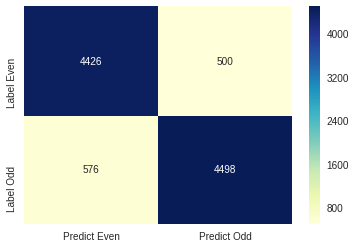

In [36]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 2]))
b = tf.Variable(tf.zeros([2]))
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 2])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y) + (1 - y_), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)


sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

# training
for _ in range(3000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  
  #Odd and Even  
  batch_ys_new = np.zeros((100, 2))
  batch_ys_new[:,0] = batch_ys[:,0]+batch_ys[:,2]+batch_ys[:,4]+batch_ys[:,6]+batch_ys[:,8]
  #print(np.sum(batch_ys[:,::2], axis = 1))
  batch_ys_new[:,1] = 1 - batch_ys_new[:,0]
  
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys_new})

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

batch_ys_new_test = np.zeros((10000, 2))
batch_ys_new_test[:,0] = mnist.test.labels[:,0]+mnist.test.labels[:,2]+mnist.test.labels[:,4]+mnist.test.labels[:,6]+mnist.test.labels[:,8]
batch_ys_new_test[:,1] = 1 - batch_ys_new_test[:,0]

print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_:  batch_ys_new_test}))

# Print confusion matrix
yPred_label = []
yTrue_label = []
yPred = sess.run(y, feed_dict={x: mnist.test.images, y_:  batch_ys_new_test})
for i in range (0, 10000):
  if yPred[i][0] > yPred[i][1]:
    yPred_label.append(0)
  else:
    yPred_label.append(1)
  if batch_ys_new_test[i][0] > batch_ys_new_test[i][1]:
    yTrue_label.append(0)
  else:
    yTrue_label.append(1)
  
cm = confusion_matrix(yTrue_label, yPred_label)
df_cm = pd.DataFrame(cm, index = ["Label Even", "Label Odd"], columns = ["Predict Even", "Predict Odd"])
sn.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt='g')

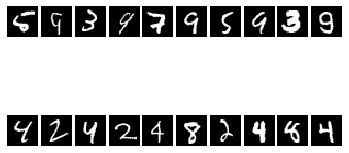

In [37]:
# Check wrong predictions
wrongEvenNum = 0
wrongOddNum = 0
wrongEvenList = []
wrongOddList = []
fig, axes = plt.subplots(2, 10)
fig.subplots_adjust(hspace=0, wspace=0.1)
for i in range (0,1000):
  if(yPred_label[i] != yTrue_label[i] and wrongEvenNum < 11 and yPred_label[i] == 0):
    wrongEvenNum += 1
    wrongEvenList.append(i)
  if(yPred_label[i] != yTrue_label[i] and wrongOddNum < 11 and yPred_label[i] == 1):
    wrongOddNum += 1
    wrongOddList.append(i)
for i in range (0, 10):
  pixels = mnist.test.images[wrongEvenList[i]].reshape((28, 28))
  axes[0,i].imshow(pixels, cmap='gray')
  axes[0,i].set_xticks([])
  axes[0,i].set_yticks([])
  pixels = mnist.test.images[wrongOddList[i]].reshape((28, 28))
  axes[1,i].imshow(pixels, cmap='gray')
  axes[1,i].set_xticks([])
  axes[1,i].set_yticks([])
#plt.show()

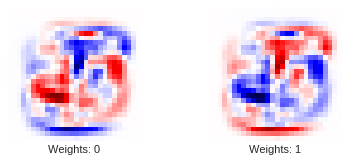

In [38]:
# Get the values for the weights from the TensorFlow variable.
w = sess.run(W, feed_dict={x: mnist.test.images, y_:  batch_ys_new_test})
# Get the lowest and highest values for the weights.
# This is used to correct the colour intensity across
# the images so they can be compared with each other.
w_min = np.min(w)
w_max = np.max(w)
# Create figure with 3x4 sub-plots,
# where the last 2 sub-plots are unused.
fig, axes = plt.subplots(1, 2)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i, ax in enumerate(axes.flat):
  # Only use the weights for the first 10 sub-plots.
  if i < 2:
    # Get the weights for the i'th digit and reshape it.
    # Note that w.shape == (img_size_flat, 10)
    image = w[:, i].reshape((28,28))
    # Set the label for the sub-plot.
    ax.set_xlabel("Weights: {0}".format(i))
    # Plot the image.
    ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')
    # Remove ticks from each sub-plot.
    ax.set_xticks([])
    ax.set_yticks([])
plt.savefig('weights.png')

Add one extra layer: 2

In [45]:

x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.random_normal([784, 10]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([10]), dtype=tf.float32)
W2 = tf.Variable(tf.random_normal([10, 2]))
b2 = tf.Variable(tf.random_normal([2]), dtype=tf.float32)

y1 = tf.nn.relu(tf.matmul(x, W) + b)
y = tf.nn.softmax(tf.matmul(y1, W2) + b2)

y_ = tf.placeholder(tf.float32, [None, 2])

#cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
y = tf.clip_by_value(y, 1e-10, 1)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)



sess = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True))
tf.global_variables_initializer().run()

# training
for _ in range(3000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  
  #Odd and Even  
  batch_ys_new = np.zeros((100, 2))
  batch_ys_new[:,0] = batch_ys[:,0]+batch_ys[:,2]+batch_ys[:,4]+batch_ys[:,6]+batch_ys[:,8]
  #print(np.sum(batch_ys[:,::2], axis = 1))
  batch_ys_new[:,1] = 1 - batch_ys_new[:,0]
  
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys_new})

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

batch_ys_new_test = np.zeros((10000, 2))
batch_ys_new_test[:,0] = mnist.test.labels[:,0]+mnist.test.labels[:,2]+mnist.test.labels[:,4]+mnist.test.labels[:,6]+mnist.test.labels[:,8]
batch_ys_new_test[:,1] = 1 - batch_ys_new_test[:,0]

#print(mnist.test.images[0])
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_:  batch_ys_new_test}))

0.8796


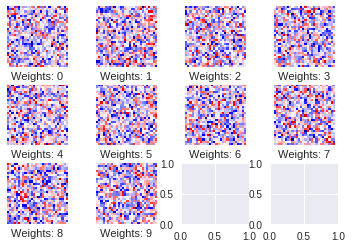

In [46]:
# Get the values for the weights from the TensorFlow variable.
w = sess.run(W, feed_dict={x: mnist.test.images, y_:  batch_ys_new_test})
# Get the lowest and highest values for the weights.
# This is used to correct the colour intensity across
# the images so they can be compared with each other.
w_min = np.min(w)
w_max = np.max(w)
# Create figure with 3x4 sub-plots,
# where the last 2 sub-plots are unused.
fig, axes = plt.subplots(3, 4)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, ax in enumerate(axes.flat):
  # Only use the weights for the first 10 sub-plots.
  if i < 10:
    # Get the weights for the i'th digit and reshape it.
    # Note that w.shape == (img_size_flat, 10)
    image = w[:, i].reshape((28,28))
    # Set the label for the sub-plot.
    ax.set_xlabel("Weights: {0}".format(i))
    # Plot the image.
    ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')
    # Remove ticks from each sub-plot.
    ax.set_xticks([])
    ax.set_yticks([])


In [0]:
# Creates a graph.
with tf.device('/gpu:0'):
  a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
  b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
  c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(
      allow_soft_placement=True, log_device_placement=True))
# Runs the op.
print(sess.run(c))

[[22. 28.]
 [49. 64.]]


test

In [62]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
W2 = tf.Variable(tf.zeros([10, 10]))
b2 = tf.Variable(tf.zeros([10]))
y = tf.nn.sigmoid(tf.matmul(x, W) + b)
y1 = tf.nn.softmax(tf.matmul(y1, W2) + b2)
y_ = tf.placeholder(tf.float32, [None, 10])

#cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)


sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

# training
for _ in range(3000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
  
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


#print(mnist.test.images[0])
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))


0.6769


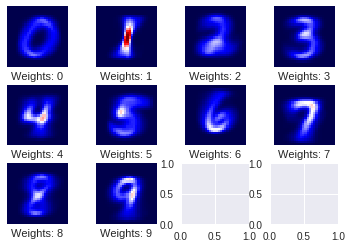

In [63]:
# Get the values for the weights from the TensorFlow variable.
w = sess.run(W, feed_dict={x: mnist.test.images, y_:  mnist.test.labels})
# Get the lowest and highest values for the weights.
# This is used to correct the colour intensity across
# the images so they can be compared with each other.
w_min = np.min(w)
w_max = np.max(w)
# Create figure with 3x4 sub-plots,
# where the last 2 sub-plots are unused.
fig, axes = plt.subplots(3, 4)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, ax in enumerate(axes.flat):
  # Only use the weights for the first 10 sub-plots.
  if i < 10:
    # Get the weights for the i'th digit and reshape it.
    # Note that w.shape == (img_size_flat, 10)
    image = w[:, i].reshape((28,28))
    # Set the label for the sub-plot.
    ax.set_xlabel("Weights: {0}".format(i))
    # Plot the image.
    ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')
    # Remove ticks from each sub-plot.
    ax.set_xticks([])
    ax.set_yticks([])


In [0]:
w = tf.Variable([1,1],[1,1])